In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from imagingIO import loopMice, loadData, loadBeh, getBeh
from analysis import dffCalc, filtData, smoothData, normData
from events import getEvents
from trials import markTrials
from bouts import getBouts, getBoutDur, getBouts_
from statistics import stdCalc, getBoutMeans, getStats, getBoutMeans_
from plotter import plotMean, plotHeat, plotTrials, plotHeatTrials

In [2]:
# Start gathering the data from FR1 exp
# Mice
mice = [(6838, 1), (6874, 1), (7104, 1), (7105, 1)]
# Parameters
behType = 'FF'
fs = 0.05
trials=[1,2]

In [3]:
# Get file paths
fileList = loopMice(mice, behType)

# Load the data
dataList = loadData(mice, behType)

# Load the behaviour
eventList = getBeh(mice, fileList['Behaviour'], behType)

# FIlter and dFF
filtList = filtData(mice, dffCalc(mice, dataList, lowest=False), cutoff=3.0, order=6)
dFFList = smoothData(mice, filtList, window=5)

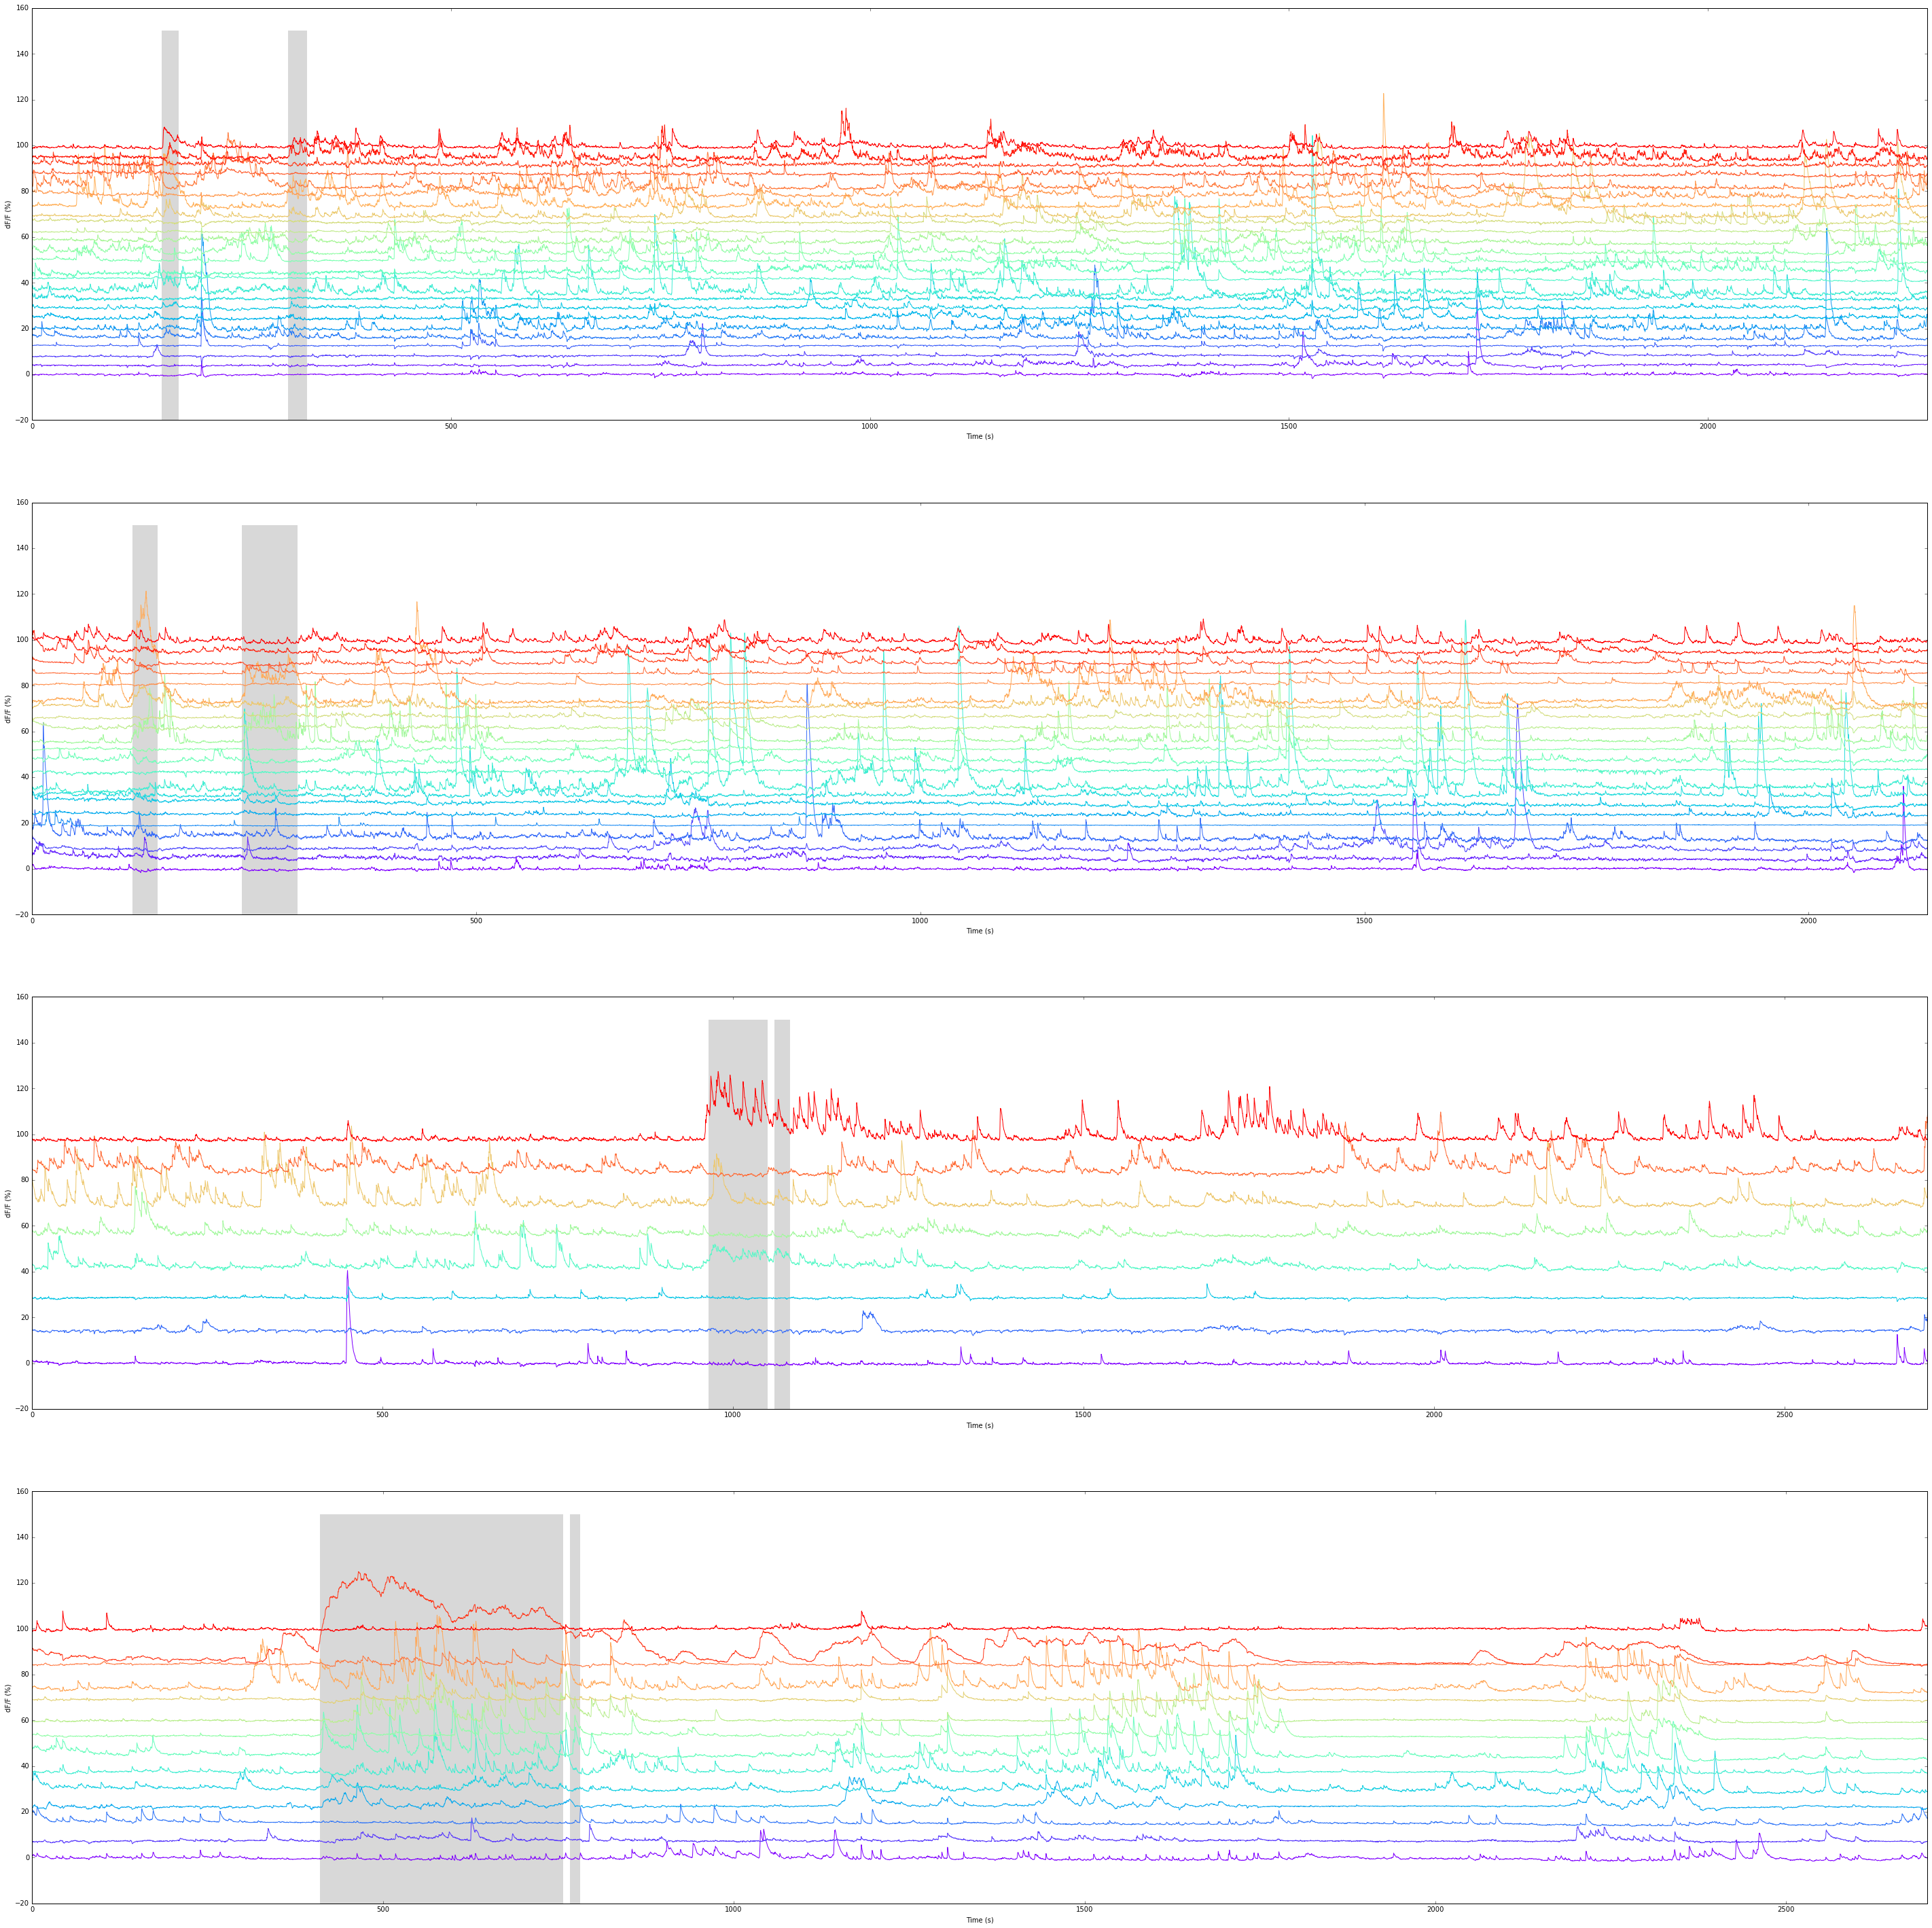

In [4]:
# Normalize the data
normList = normData(mice, dFFList)

# Get the events
eventStart = getEvents(mice, eventList, 'Eating_Start', trials)
eventEnd = getEvents(mice, eventList, 'Eating_End', trials)

if True:
    # Plot the dFF data
    n = 100
    fig = plt.figure(figsize=(50,50), facecolor="w", dpi= 150)
    for i, [mus, sess] in enumerate(mice):    
        offset = np.linspace(0, n, len(dFFList[mus].columns))
        ax = plt.subplot(len(mice),1,i+1)
        (dFFList[mus]+offset).plot(ax=ax, legend=False, cmap=plt.cm.rainbow)
        ax.set_ylabel("dF/F (%)")

        # Plot the eating bouts
        for i, event in enumerate(eventStart[mus]):
            ax.fill_between([eventStart[mus].loc[i+1], eventEnd[mus].loc[i+1]], -20, 150, facecolor='gray', linewidth=0, alpha=0.3, zorder=-55)

    #fig.savefig("J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\first_draft\\1_all_cells_filt2_dff.svg")

In [5]:
# Pick the event
save = False
eventType = 'Eating_Start'
base = -40.0
duration = 40.0

# Plot the mean of all
eventsData = markTrials(mice, dFFList, base=base, duration=duration, eventType=eventType, behType=behType, trials=trials, baselining=True)
eventsData_norm = markTrials(mice, normList, base=base, duration=duration, eventType=eventType, behType=behType, trials=trials, baselining=False)

# Calculate the mean and sem
mean=eventsData.pivot_table(index=['Event', 'Cell'], columns='New_Time').mean()
sem=eventsData.pivot_table(index=['Event', 'Cell'], columns='New_Time').sem()
time = np.arange(base,duration,fs)

heatData = eventsData_norm.pivot_table(index=['Event', 'Cell'], columns='New_Time').loc[1]

heatTrials = pd.DataFrame()
for ind in np.arange(trials[0], trials[1]+1):
    heatData = eventsData_norm.pivot_table(index=['Event', 'Cell'], columns='New_Time').loc[ind]

    sortAx = heatData.mean(axis=1)
    heatData
    heatData['Cell_Mean'] = sortAx
    heatData = heatData.sort_values(by='Cell_Mean', ascending=False)

    heatTrials = heatTrials.append(heatData['Fluoro'])
    
sortAx = heatData.mean(axis=1)
heatData['Cell_Mean'] = sortAx
heatData = heatData.sort_values(by='Cell_Mean', ascending=False)

#fig, ax = plotHeatTrials(heatData['Fluoro'], eventType, base, duration, trials, fs=0.05, figsize=(6,5), seperate=False, vmin=0.0, vmax=1.0)

#fig2, ax2 = plotHeatTrials(heatTrials, eventType, base, duration, trials, fs=0.05, figsize=(5,10), seperate=True, vmin=0.0, vmax=1.0)

fname = "J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\first_draft\\"+"_"+eventType+ "_everything_heatmap_"+str(base)+"sec.png"
if save:
    fig.savefig(fname)



4  mice were loaded.

4  mice were loaded.


(<matplotlib.figure.Figure at 0xc656400>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc6566a0>)

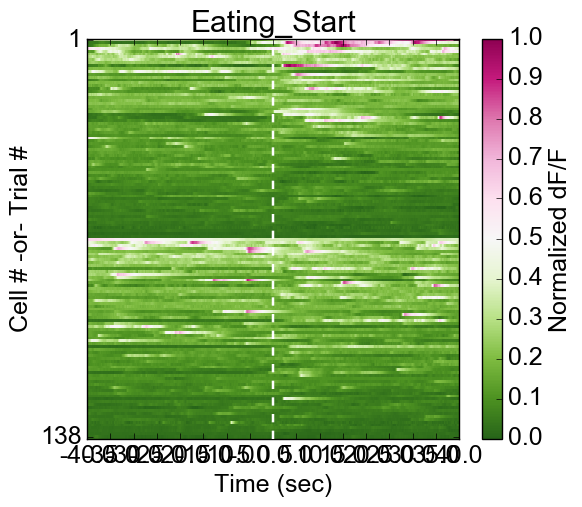

In [6]:
plotHeatTrials(heatTrials, eventType, base, duration, trials, fs=0.05, figsize=(6,5), seperate=False, vmin=0.0, vmax=1.0)

In [66]:
heatFirst=pd.DataFrame(heatTrials.values[:69, :]).T
sorter=heatFirst.loc[800:].mean(axis=0)
#sorter.sort_values(by=[sorter.index], ascending=False)

heatFirst = heatFirst.append(sorter, ignore_index=True).T
heatSort=heatFirst.sort_values(by=[1600], ascending=False).drop(1600, 1)

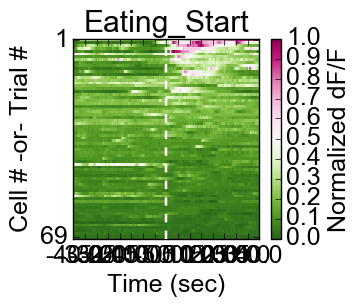

In [73]:
fig, ax = plotHeatTrials(heatSort, eventType, base, duration, trials, fs=0.05, figsize=(3,2.5), seperate=False, vmin=0.0, vmax=1.0)
fname = "J:\\Hakan Kucukdereli\\Miniscope_Behaviour_MPIN\\scripts\\figures\\first_draft\\heatmaps\\"+"FF_"+eventType+ "_everything_heatmap_"+str(base)+"40sec_firstBout.pdf"
fig.savefig(fname)

In [ ]:
eventsData_norm[eventsData_norm['Fluoro'] < 0.1]

In [ ]:
data = (dFFList[6838] - dFFList[6838].min()) / (dFFList[6838].max() - dFFList[6838].min())
data.min().min(), data.max().max()